In [2]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06


In [3]:
f2 = r.TFile("../truncationTest/data/results_pileupBinning6_9day.root")

In [4]:
triples = f2.Get("clustersAndCoincidences").Get("triples")
triples_b = f2.Get("clustersAndCoincidences").Get("backwardsTriples")
print(triples)

<ROOT.TH2I object ("triples") at 0x7fffc6644190>


In [5]:
triplesTrunc = f2.Get("clustersAndCoincidencesTrunc").Get("triples")
triplesTrunc_b = f2.Get("clustersAndCoincidencesTrunc").Get("backwardsTriples")
print(triples)

<ROOT.TH2I object ("triples") at 0x7fffc6644190>


In [13]:
lifetimeFirstGuess = 64.373
lifetimeFirstGuessTrunc = 64.370

In [10]:
lm = MuonLoss(triples, triples_b, lifetimeFirstGuess, 0, False, 0)

In [11]:
DumpClass(lm)

Dumping:  <lost_muon_calculation.MuonLoss object at 0x7f6c75dede10>
Class:  <class 'lost_muon_calculation.MuonLoss'>
    triples = <ROOT.TH1D object ("triples") at 0x7fffc66c1540>
    backwardsTriples = <ROOT.TH1D object ("b_triples") at 0x7fffc66c08d0>
    tau = 64.373
    subtractBackwards = False
    caloNum = 0
    muonLossHist = <ROOT.TH1D object ("muonLossHist") at 0x7fffc696f350>
    iteration = 0


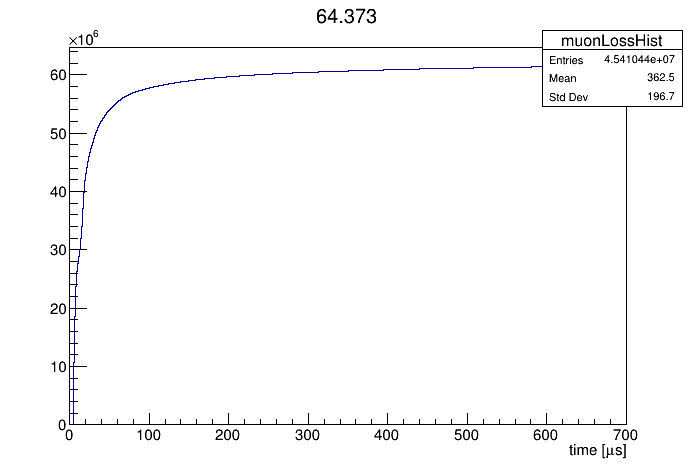

In [16]:
c = r.TCanvas()
lm.muonLossHist.Draw()
c.Draw()

In [14]:
lmt = MuonLoss(triplesTrunc, triplesTrunc_b, lifetimeFirstGuessTrunc, 0, False, 0)

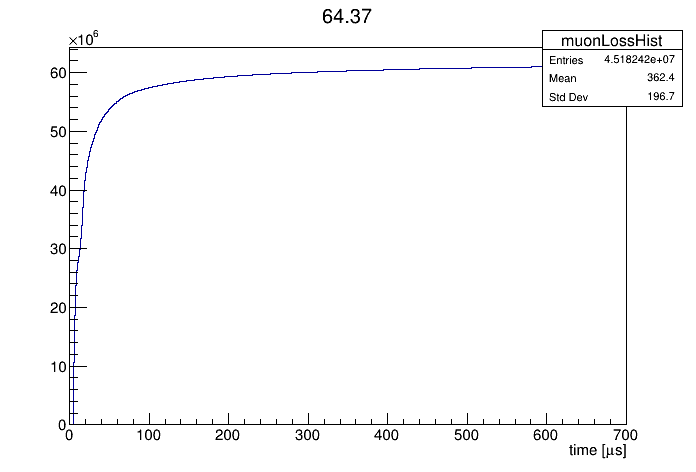

In [15]:
c = r.TCanvas()
lmt.muonLossHist.Draw()
c.Draw()

In [44]:
lmDiff = lm.muonLossHist.Clone("lmDiff")
lmDiff.Scale(1/lmDiff.Integral())
lmtHist = lmt.muonLossHist.Clone()
lmtHist.Scale(1/lmtHist.Integral())
lmDiff.Add(lmtHist,-1)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


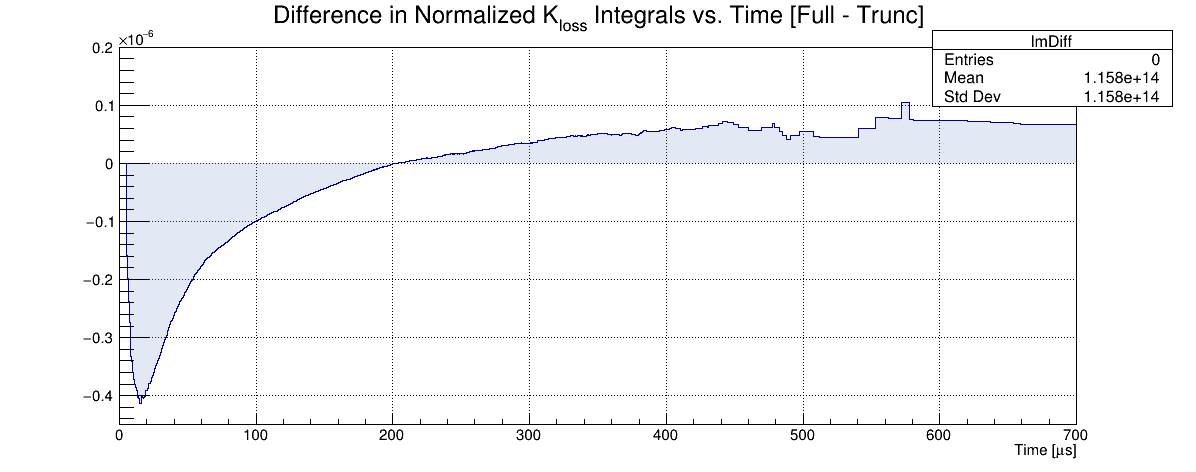

In [52]:
c = r.TCanvas("c","c",1200,500)
#lmDiff.GetYaxis().SetRangeUser(10**(-10), 10**(-6))
lmDiff.GetYaxis().SetRangeUser(-1*0.45*10**(-6), 0.2*10**(-6))
lmDiff.SetTitle("Difference in Normalized K_{loss} Integrals vs. Time [Full - Trunc]; Time [#mus]")
lmDiff.Draw("hist")
lmDiff.SetFillColorAlpha(38,0.2)
lmDiffInv = InvertTH1(lmDiff,"",2,0)
#lmDiffInv.Draw("hist SAME")
#c.SetLogy()
c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


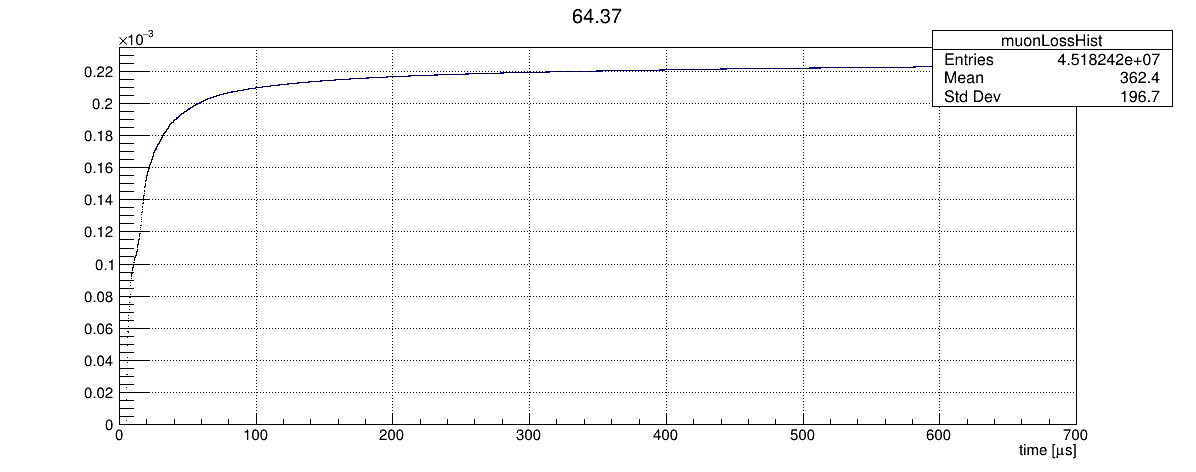

In [43]:
c = r.TCanvas("c","c",1200,500)
lmtHist.Draw()
#c.SetLogy()
c.SetGrid()
c.Draw()